In [4]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
import scipy.stats as st
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

## Loading the dataset

In [5]:
dataset=pd.read_csv("C:/Users/yazhini/OneDrive/Pictures/PROJECTS/JOB RECRUITMENT/Placement_data_full_class.csv")
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


# EDA

In [6]:
#no of unique values in each attribute 
dataset.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             46
dtype: int64

In [7]:
#rows and columns
dataset.shape

(215, 15)

In [8]:
#basic information about the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 25.3+ KB


In [9]:
#description of the dataset
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
#counting the values of an attribute
dataset.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [11]:
#Finding the duplicates
dataset.duplicated().sum()

0

In [12]:
#unique values
dataset['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [13]:
#unique values
dataset['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [14]:
#Finding null values
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [15]:
#datatypes
dataset.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary              int64
dtype: object

### Data pre-processing

In [16]:
#Replace null values
dataset.replace(np.nan,'0',inplace = True)
#Checking the changes now
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# univariate analysis

In [17]:
#finding unique values,maximum and count of variable
print(dataset.ssc_p.nunique())
print(dataset.ssc_p.unique())
print(dataset.ssc_p.max())
print(dataset.ssc_p.value_counts())

103
[67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63.   60.   79.   69.8  77.4  76.5  52.58 71.   76.76 64.
 61.   87.   69.   51.   81.   78.   74.   49.   76.   70.89 50.   75.2
 54.4  40.89 80.   60.4  68.   52.6  84.2  86.5  54.   83.   80.92 69.7
 75.   84.86 64.6  56.6  59.   66.5  84.   81.7  70.   83.84 59.6  66.
 85.   52.   60.23 70.5  45.   61.08 69.5  73.96 68.2  60.8  72.   80.4
 76.7  74.9  77.44 77.67 89.4  44.   75.4  53.   51.57 55.6  74.2  67.16
 63.3  67.9  48.   59.96 63.4  73.24 77.8  56.28 88.   78.5  61.8  65.2
 83.96 54.2  55.68 41.   83.33 43.   80.6 ]
89.4
62.00    11
63.00    10
67.00     9
73.00     9
52.00     9
         ..
63.40     1
63.30     1
73.96     1
77.67     1
65.20     1
Name: ssc_p, Length: 103, dtype: int64


<AxesSubplot:>

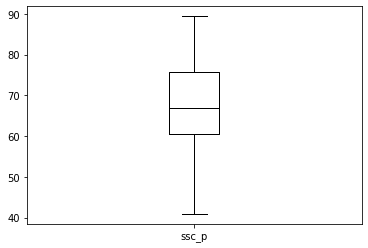

In [18]:
#boxplot to find outliers, minimum, maximum and range values of the variable prodcost
dataset.boxplot(column=['ssc_p'], grid=False, color='black')

array([[<AxesSubplot:title={'center':'ssc_p'}>]], dtype=object)

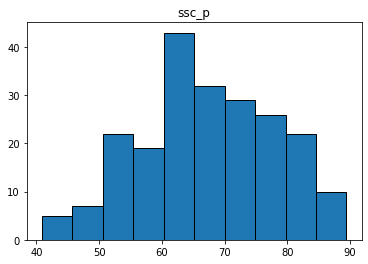

In [19]:
#histogram to visualize the attribute prodcost
dataset.hist(column='ssc_p', grid=False, edgecolor='black')

# bivariate analysis 

Text(0, 0.5, 'SSC percentage')

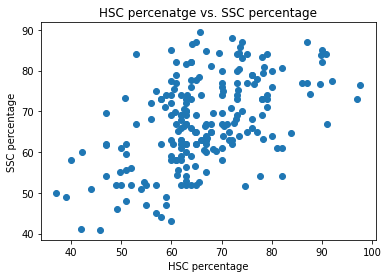

In [20]:
#analysis between two attributes 
plt.scatter(dataset.hsc_p, dataset.ssc_p)
plt.title('HSC percenatge vs. SSC percentage')
plt.xlabel('HSC percentage')
plt.ylabel('SSC percentage')

# sorting alogirthm

In [21]:
dataset1=pd.read_csv("C:/Users/yazhini/OneDrive/Pictures/PROJECTS/JOB RECRUITMENT/Placement_data_full_class.csv")

In [22]:
dataset1.sort_values("ssc_p",inplace=True)

In [23]:
dataset1.sort_index()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


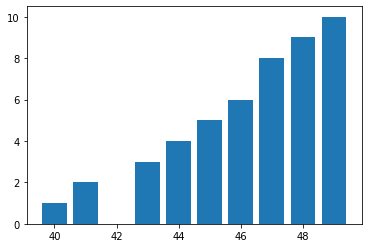

In [24]:
x = [40, 41, 43, 44, 45, 46, 47, 47, 48, 49]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.bar(x, y)
plt.show()

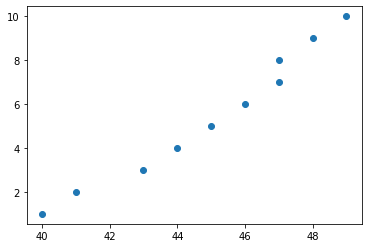

In [25]:
x = [40, 41, 43, 44, 45, 46, 47, 47, 48, 49]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.scatter(x, y)
plt.show()

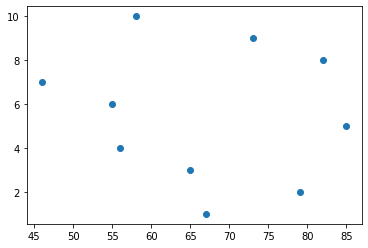

In [26]:
x = [67,79,65,56,85,55,46,82,73,58]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.scatter(x, y)
plt.show()

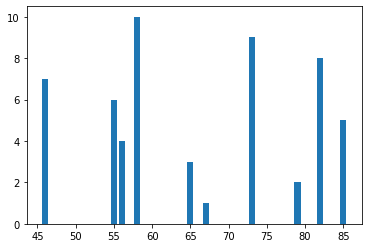

In [27]:
x = [67,79,65,56,85,55,46,82,73,58]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.bar(x, y)
plt.show()

# Naive Bayes 

In [28]:
dataset3=pd.read_csv("C:/Users/yazhini/OneDrive/Pictures/PROJECTS/JOB RECRUITMENT/naive recruitment.csv")
dataset3.head(100)

,ssc_p,hsc_p,status
0,67.00,91.00,1
1,79.33,78.33,1
2,65.00,68.00,1
3,56.00,52.00,0
4,85.80,73.60,1
...,...,...,...
95,73.00,78.00,1
96,76.00,70.00,1
97,70.50,62.50,0
98,69.00,73.00,1


In [29]:
x = dataset3.drop('status',axis=1)
y = dataset3['status']
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.50,random_state=42)

In [30]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [31]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8055555555555556


In [33]:
accuracy1 = accuracy_score(y_test,y_pred)*100
print("The Accuracy Percentage is:",accuracy1)

The Accuracy Percentage is: 80.55555555555556


# Decison Tree Classifier

In [34]:
dataset4=pd.read_csv("C:/Users/yazhini/OneDrive/Pictures/PROJECTS/JOB RECRUITMENT/naive recruitment.csv")
dataset4.head(100)

,ssc_p,hsc_p,status
0,67.00,91.00,1
1,79.33,78.33,1
2,65.00,68.00,1
3,56.00,52.00,0
4,85.80,73.60,1
...,...,...,...
95,73.00,78.00,1
96,76.00,70.00,1
97,70.50,62.50,0
98,69.00,73.00,1


In [35]:
train_features = dataset4.iloc[:100,:-1]
test_features = dataset4.iloc[100:,:-1]
train_targets = dataset4.iloc[:100,-1]
test_targets = dataset4.iloc[100:,-1]

In [37]:
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)

In [38]:
prediction = tree.predict(test_features)

In [39]:
print("The prediction accuracy is: ",)

The prediction accuracy is: 


In [40]:
print("Accuracy:",tree.score(test_features,test_targets))

Accuracy: 0.7304347826086957


In [41]:
accuracy2 = tree.score(test_features,test_targets)*100
print ("The Accuracy Percentage is:",accuracy2)

The Accuracy Percentage is: 73.04347826086956


# Comaprison of accuracies

In [42]:
print ("Accuracy from Naive bayes :",accuracy1)
print ("Accuracy from Decision Tree Classifier:",accuracy2)

Accuracy from Naive bayes : 80.55555555555556
Accuracy from Decision Tree Classifier: 73.04347826086956
